In [1]:
!pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [3]:
!pip install tensorflow keras opencv-python scikit-learn matplotlib pandas


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 26.2 MB/s eta 0:00:00 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 6.0 MB/s eta 0:00:00 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
googleapis-common-protos 1.63.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you have protobuf 5.29.3 which is incompatible.
opentelemetry-proto 1.16.0 requires protobuf<5.0,>=3.19, but you have protobuf 5.29.3 which is incompatible.
streamlit 1.16.0 requires protobuf<4,>=3.12, but you have protobuf 5.29.3 which is incompatible.


In [5]:
!pip uninstall protobuf -y


Found existing installation: protobuf 5.29.3
Uninstalling protobuf-5.29.3:
  Successfully uninstalled protobuf-5.29.3


In [9]:
!pip install "protobuf<4"


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [15]:
!unzip "archive (3).zip" -d ./data


Archive:  archive (3).zip
  inflating: ./data/Indian Food Images/Indian Food Images/adhirasam/02d09e872d.jpg  
  inflating: ./data/Indian Food Images/Indian Food Images/adhirasam/02f2e49039.jpg  
  inflating: ./data/Indian Food Images/Indian Food Images/adhirasam/06c639bab2.jpg  
  inflating: ./data/Indian Food Images/Indian Food Images/adhirasam/08b8f8efc1.jpg  
  inflating: ./data/Indian Food Images/Indian Food Images/adhirasam/09a37d7cc7.jpg  
  inflating: ./data/Indian Food Images/Indian Food Images/adhirasam/0cd70ffc10.jpg  
  inflating: ./data/Indian Food Images/Indian Food Images/adhirasam/0d09b0e580.jpg  
  inflating: ./data/Indian Food Images/Indian Food Images/adhirasam/0e84c2b7fd.jpg  
  inflating: ./data/Indian Food Images/Indian Food Images/adhirasam/10f608ecc4.jpg  
  inflating: ./data/Indian Food Images/Indian Food Images/adhirasam/12b1eb8026.jpg  
  inflating: ./data/Indian Food Images/Indian Food Images/adhirasam/13a2cfd13f.jpg  
  inflating: ./data/Indian Food Images/

In [17]:
!ls ./data


'Indian Food Images'  'List of Indian Foods.txt'


In [21]:
import os

data_path = './data' 
classes = os.listdir(data_path)
print(f"Available classes: {classes}")


Available classes: ['Indian Food Images', 'List of Indian Foods.txt']


In [33]:
import os
import cv2
import numpy as np

# Function to load images and labels
def load_images(data_path):
    images = []
    labels = []
    
    # Loop over all subdirectories in the dataset folder (only directories)
    for label, category in enumerate(os.listdir(data_path)):
        category_path = os.path.join(data_path, category)
        
        # Skip files that are not directories
        if not os.path.isdir(category_path):
            print(f"Skipping {category_path}, not a directory")
            continue
        
        # Debugging output: print the category path being processed
        print(f"Processing category: {category} at {category_path}")
        
        # Load images from the category directory
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            # Only process image files (jpg, png, etc.)
            if img_name.lower().endswith(('jpg', 'jpeg', 'png')):
                try:
                    img = cv2.imread(img_path)
                    
                    # Check if the image is loaded correctly
                    if img is None:
                        print(f"Error loading image {img_path}")
                        continue
                    
                    img = cv2.resize(img, (224, 224))  # Resize to a fixed size
                    images.append(img)
                    labels.append(label)
                except Exception as e:
                    print(f"Error processing {img_path}: {e}")
    
    return np.array(images), np.array(labels)

# Path to your dataset folder
data_path = './data/Indian Food Images/Indian Food Images'  # Adjust this if needed

# Load images and labels
images, labels = load_images(data_path)

# Normalize pixel values
images = images / 255.0

print(f"Loaded {len(images)} images with labels.")


Processing category: chak_hao_kheer at ./data/Indian Food Images/Indian Food Images/chak_hao_kheer
Processing category: aloo_methi at ./data/Indian Food Images/Indian Food Images/aloo_methi
Processing category: aloo_matar at ./data/Indian Food Images/Indian Food Images/aloo_matar
Processing category: modak at ./data/Indian Food Images/Indian Food Images/modak
Processing category: biryani at ./data/Indian Food Images/Indian Food Images/biryani
Processing category: bhindi_masala at ./data/Indian Food Images/Indian Food Images/bhindi_masala
Processing category: paneer_butter_masala at ./data/Indian Food Images/Indian Food Images/paneer_butter_masala
Processing category: makki_di_roti_sarson_da_saag at ./data/Indian Food Images/Indian Food Images/makki_di_roti_sarson_da_saag
Processing category: dum_aloo at ./data/Indian Food Images/Indian Food Images/dum_aloo
Processing category: boondi at ./data/Indian Food Images/Indian Food Images/boondi
Processing category: qubani_ka_meetha at ./data/

In [7]:
data_dir = "./data/Indian Food Images/Indian Food Images"
categories = os.listdir(data_dir)  # List all categories (subfolders)

images = []  # To store image data
labels = []  # To store corresponding labels

# Iterate through each category
for category in categories:
    category_path = os.path.join(data_dir, category)  # Path to category folder
    if os.path.isdir(category_path):  # Check if it's a valid folder
        for img_file in os.listdir(category_path):  # Iterate through images
            img_path = os.path.join(category_path, img_file)  # Full path to image
            try:
                # Read and preprocess the image
                img = cv2.imread(img_path)  # Read image
                img = cv2.resize(img, (128, 128))  # Resize to (128x128)
                images.append(img)  # Add to images list
                labels.append(category)  # Add corresponding label
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

print(f"Loaded {len(images)} images with {len(labels)} labels.")

Error loading image ./data/Indian Food Images/Indian Food Images/chak_hao_kheer/70a5be32e9.jpg: name 'cv2' is not defined
Error loading image ./data/Indian Food Images/Indian Food Images/chak_hao_kheer/3c68cef240.jpg: name 'cv2' is not defined
Error loading image ./data/Indian Food Images/Indian Food Images/chak_hao_kheer/2fe3d6519c.jpg: name 'cv2' is not defined
Error loading image ./data/Indian Food Images/Indian Food Images/chak_hao_kheer/0b215aeccd.jpg: name 'cv2' is not defined
Error loading image ./data/Indian Food Images/Indian Food Images/chak_hao_kheer/0b8486e5d0.jpg: name 'cv2' is not defined
Error loading image ./data/Indian Food Images/Indian Food Images/chak_hao_kheer/8c7c17eb26.jpg: name 'cv2' is not defined
Error loading image ./data/Indian Food Images/Indian Food Images/chak_hao_kheer/05ff609a12.jpg: name 'cv2' is not defined
Error loading image ./data/Indian Food Images/Indian Food Images/chak_hao_kheer/3e13adc9e3.jpg: name 'cv2' is not defined
Error loading image ./da

In [9]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2


In [3]:
import os
import cv2  # Make sure OpenCV is imported
import numpy as np

data_dir = "./data/Indian Food Images/Indian Food Images"
categories = os.listdir(data_dir)

images = []  
labels = []  
# Iterate through each category
for category in categories:
    category_path = os.path.join(data_dir, category)  # Path to category folder
    if os.path.isdir(category_path):  # Check if it's a valid folder
        for img_file in os.listdir(category_path):  # Iterate through images
            img_path = os.path.join(category_path, img_file)  # Full path to image
            try:
                img = cv2.imread(img_path)  # Read image
                img = cv2.resize(img, (128, 128))  # Resize to 128x128 pixels
                images.append(img)  # Add to images list
                labels.append(category)  # Add corresponding label
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")


images = np.array(images)
labels = np.array(labels)

print(f"Loaded {len(images)} images with {len(labels)} labels.")


Loaded 4000 images with 4000 labels.


In [5]:
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")


Images shape: (4000, 128, 128, 3)
Labels shape: (4000,)


In [7]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 3200, Testing samples: 800


In [19]:
classes = sorted(list(set(labels)))  # Get unique labels

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')  # Assuming 'classes' is defined as your class labels
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 80)             │        10,320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,402,640 (28.24 MB)

 Trainable params: 7,402,640 (28.24 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [27]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 460ms/step - accuracy: 0.0121 - loss: 4.5404 - val_accuracy: 0.0150 - val_loss: 4.3776
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 383ms/step - accuracy: 0.0267 - loss: 4.3597 - val_accuracy: 0.0413 - val_loss: 4.3123
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 416ms/step - accuracy: 0.0835 - loss: 4.0881 - val_accuracy: 0.0688 - val_loss: 4.2257
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 361ms/step - accuracy: 0.2181 - loss: 3.3602 - val_accuracy: 0.1525 - val_loss: 3.9718
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 412ms/step - accuracy: 0.3971 - loss: 2.5029 - val_accuracy: 0.2025 - val_loss: 3.9615
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 377ms/step - accuracy: 0.5771 - loss: 1.7455 - val_accuracy: 0.2200 - val_loss: 4.0333
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 460ms/step - accuracy: 0.6887 - loss: 1.2837 - val_accuracy: 0.2275 - val_loss: 4.3482
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 424ms/step - accuracy: 0.7556 - loss: 0

25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.2416 - loss: 4.9732
Test accuracy: 24.88%


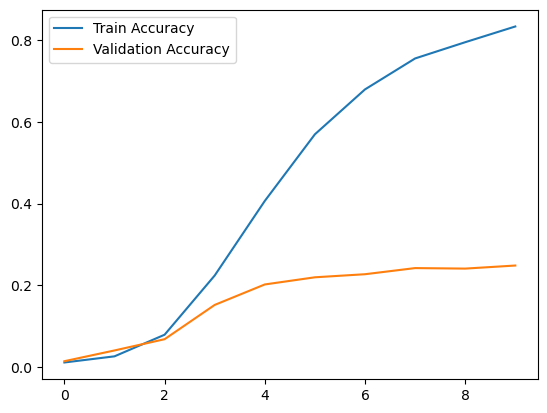

In [29]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [31]:
calorie_map = {
    0: 200,  # Example: class 0 = 200 calories
    1: 300,  # Example: class 1 = 300 calories
    # Add mappings for all classes
}

def estimate_calories(image, model):
    image_resized = cv2.resize(image, IMG_SIZE) / 255.0
    image_resized = np.expand_dims(image_resized, axis=0)
    predictions = model.predict(image_resized)
    predicted_class = np.argmax(predictions)
    calories = calorie_map.get(predicted_class, "Unknown")
    return predicted_class, calories


In [33]:
model.save("food_recognition_model.h5")


In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
